# Qualitative Analyse

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load
from tensorflow import keras
import os
import pickle

In [2]:
df_fdi = pd.read_csv("data/preprocessed/preprocessed_fdi.csv")
df_fdi = df_fdi[df_fdi['invest_actual'] == 1]
print(df_fdi.shape)
df_fdi.head()

(3267, 27)


,invest_actual,year,sic,foundingyear,isin,oprevenue,plbeforetax,netincome,cashflow,totassets,...,debt,gearing,ROA_bt,productivity,age,intangibleassets_ratio,RD_intensity,dist,cowc_source,cowc_dest
109,1,2017,3648,1950,AT0000837307,-0.234315,-0.152370,-0.176875,-0.211426,-0.257013,...,-0.239310,0.041036,-0.293237,-0.039172,0.531439,0.363833,-0.018708,-1.751584,AT,RS
162,1,2018,3648,1950,AT0000837307,-0.237212,-0.147405,-0.168673,-0.208636,-0.259172,...,-0.242774,0.037031,-0.187309,-0.039196,0.555231,0.342040,-0.018963,-1.621079,AT,FR
351,1,2019,3648,1950,AT0000837307,-0.245145,-0.165816,-0.210799,-0.237194,-0.260648,...,-0.240538,0.053212,-0.567264,-0.039822,0.579023,0.307380,-0.018980,-1.317468,AT,PT
398,1,2014,3554,1900,AT0000730007,0.071248,-0.130205,-0.144596,-0.149900,-0.058693,...,0.032609,0.113554,-0.294434,-0.035631,1.649653,-0.137055,-0.019736,-0.207073,AT,CA
399,1,2017,3554,1900,AT0000730007,0.093250,-0.021202,-0.023037,-0.069855,-0.031069,...,0.047396,0.077576,0.059784,-0.035746,1.721028,-0.274484,-0.019771,-0.531656,AT,IN


### Ranking Results

#### 1.)

Looking for Invetsment recommendations for a german company (Packaging Machinery) in 2018

2018 - DE - DE0006335003 (3565)

*LSTM Suggestion*
- FR 0.0613
- US 0.0603
- CN 0.596
- NL 0.0571
- GB 0.056

*Logistic Regression Suggestion*
- US 0.1292
- GB 0.0557
- FR 0.0471
- IT 0.0367
- ES 0.0322



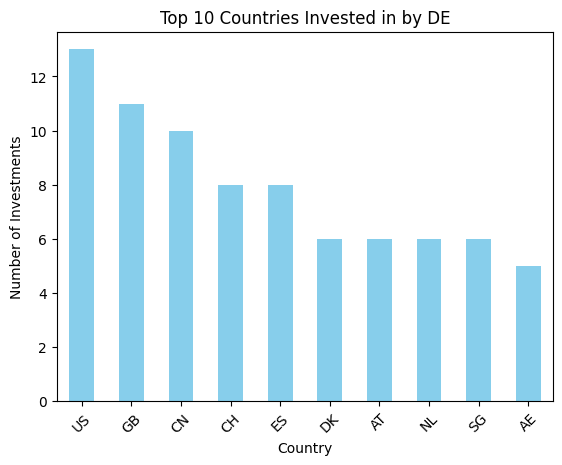

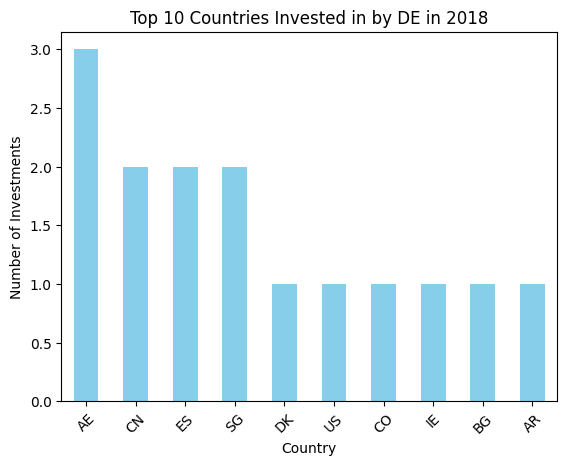

<Figure size 640x480 with 0 Axes>

In [3]:
year = 2018
country = 'DE'
sic = 3565
isin = 'DE0006335003'
best_ls = 'FR'
best_lr = 'US'
relevant_variables = ['plbeforetax', 'netincome', 'cashflow', 'totassets', 'shareholderfunds', 'currentratio', 'profitmargin', 'debt']

# Filter DataFrame for rows where 'cowc_source' is 'DE'
de_investments = df_fdi[df_fdi['cowc_source'] == country]

# Group by 'cowc_dest' and count occurrences
country_counts = de_investments['cowc_dest'].value_counts()

# Plot the top 10 countries
top_countries = country_counts.head(10)

# Plotting
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Invested in by ' + country)
plt.xlabel('Country')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/top_10_investments_plot.png',dpi=300)

# Filter DataFrame for rows where 'year' is 2018 and 'cowc_source' is 'DE'
de_investments_2018 = df_fdi[(df_fdi['year'] == year) & (df_fdi['cowc_source'] == country)]

# Group by 'cowc_dest' and count occurrences
country_counts_2018 = de_investments_2018['cowc_dest'].value_counts()

# Plot the top 10 countries
top_countries_2018 = country_counts_2018.head(10)

# Plotting
top_countries_2018.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Invested in by '+country+' in ' + str(year))
plt.xlabel('Country')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/top_10_investments_in_year_plot.png',dpi=300)

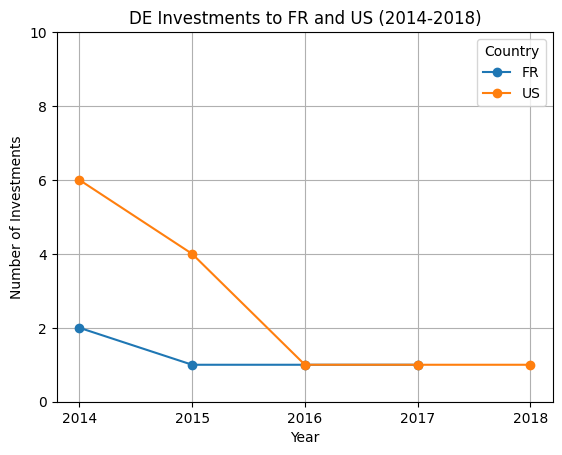

In [4]:
# Filter DataFrame for rows where 'cowc_source' is 'DE' and 'cowc_dest' is either 'US' or 'FR'
de_investments = df_fdi[(df_fdi['cowc_source'] == country) & (df_fdi['cowc_dest'].isin([best_ls, best_lr]))]

# Filter DataFrame for the years 2014 to 2018
de_investments = de_investments[de_investments['year'].between(2014, year)]

# Group by 'year' and 'cowc_dest' and count occurrences
investments_by_year_country = de_investments.groupby(['year', 'cowc_dest']).size().unstack()

# Plotting
investments_by_year_country.plot(kind='line', marker='o')
plt.title(country + ' Investments to '+best_ls+' and ' + best_lr+ ' (2014-'+str(year)+')')
plt.xlabel('Year')
plt.ylabel('Number of Investments')
plt.ylim(0,10)
plt.legend(title='Country')
plt.xticks(range(2014, 2019))
plt.grid(True)
plt.show()

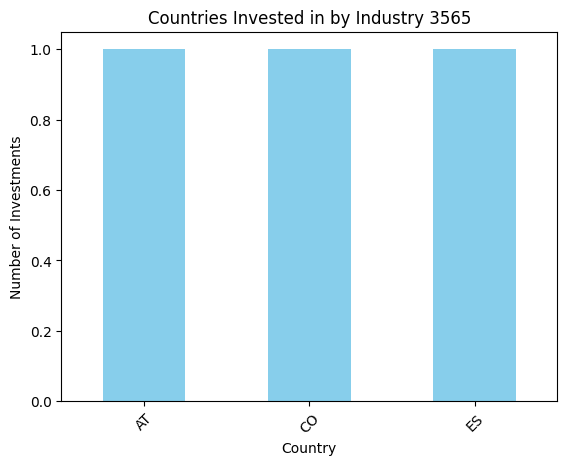

In [5]:
# Filter DataFrame for rows where 'sic' is '3565'
industry_investments = df_fdi[df_fdi['sic'] == sic]

# Group by 'cowc_dest' and count occurrences
country_counts = industry_investments['cowc_dest'].value_counts()

# Plotting
country_counts.plot(kind='bar', color='skyblue')
plt.title('Countries Invested in by Industry ' + str(sic))
plt.xlabel('Country')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Subset the DataFrame containing relevant variables
relevant_variables = df_fdi[['plbeforetax', 'netincome', 'cashflow', 'totassets', 'shareholderfunds', 'currentratio', 'profitmargin', 'debt']]  # Add other relevant variables as needed

# Normalize the data
normalized_data = (relevant_variables - relevant_variables.mean()) / relevant_variables.std()

# Extract the data for the company of interest (DE0006335003)
company_of_interest = normalized_data[df_fdi['isin'] == isin]

# Calculate cosine similarity
similarities = cosine_similarity(company_of_interest, normalized_data)

# Convert similarities array to a DataFrame
similarities_df = pd.DataFrame(similarities.reshape(-1, len(df_fdi)), columns=df_fdi['isin'])

# Sort the companies based on similarity scores
similar_companies = similarities_df.iloc[0].sort_values(ascending=False)

# Display the top similar companies
print("Top 5 similar companies:")
print(similar_companies.head(5))

Top 5 similar companies:
isin
DE0006335003    1.000000
SE0012674232    0.999540
GB00BKDM7X41    0.999446
US6253831043    0.999396
ES0136463017    0.999150
Name: 0, dtype: float64


In [7]:
df_most_similar = df_fdi[df_fdi['isin'].isin(similar_companies.head(5).index)]
df_most_similar = df_most_similar.drop_duplicates(subset='isin')
df_most_similar[['isin','sic']].head()

,isin,sic
71136,DE0006335003,3565
81800,ES0136463017,4911
109641,GB00BKDM7X41,3728
280774,SE0012674232,2542
324143,US6253831043,2754


In [8]:
# Extract the second and third most similar company IDs
second_similar_company_id = similar_companies.index[1]
third_similar_company_id = similar_companies.index[2]

# Filter the original DataFrame to get data for the second most similar company
second_similar_company_data = df_fdi[df_fdi['isin'] == second_similar_company_id]

# Filter the original DataFrame to get data for the third most similar company
third_similar_company_data = df_fdi[df_fdi['isin'] == third_similar_company_id]

# Get the top 5 countries invested in by the second most similar company
top_countries_second_company = second_similar_company_data['cowc_dest'].value_counts().head(5)

# Get the top 5 countries invested in by the third most similar company
top_countries_third_company = third_similar_company_data['cowc_dest'].value_counts().head(5)

print("Top 5 countries invested in by the second most similar company:")
print(top_countries_second_company)

print("\nTop 5 countries invested in by the third most similar company:")
print(top_countries_third_company)

Top 5 countries invested in by the second most similar company:
NL    1
Name: cowc_dest, dtype: int64

Top 5 countries invested in by the third most similar company:
AE    1
Name: cowc_dest, dtype: int64


In [10]:
#!pip install --upgrade scikit-learn==1.3.2